In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SRISHTI JHA\OneDrive\Desktop\spotify.zip")
df = df.sample(n=5000,random_state=42).reset_index(drop=True)
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850
1,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487
2,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870
3,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700
4,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850


In [6]:
# Select relevant numerical features for clustering
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_features = [
    "valence", "danceability", "energy", "tempo", 
    "acousticness", "liveness", "speechiness", "instrumentalness"
]

# Filter and sample
df = df.dropna(subset=numerical_features)
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

df_scaled

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,0.228492,-0.137849,-0.139930,-0.414488,0.936060,0.251695,-0.469952,-0.482854
1,0.445836,-1.362863,-0.410572,1.585703,0.927614,0.647376,-0.385262,-0.483582
2,-1.633423,-2.659651,-1.798091,-1.621892,0.936060,-0.164278,-0.431407,2.631643
3,-0.251953,0.919872,1.076056,1.678209,-0.912069,1.834421,-0.016639,-0.482359
4,0.983477,0.083409,-0.368642,-1.175334,1.226062,3.513532,4.277628,-0.483582
...,...,...,...,...,...,...,...,...
4995,-0.004104,-0.499417,1.533479,-0.640133,-0.940225,-0.676635,-0.283198,-0.472578
4996,-0.053674,-0.564176,-1.302549,-0.842790,1.741309,0.642303,-0.371689,-0.452596
4997,0.735628,-0.521004,1.015066,1.747145,-0.727932,-0.762874,-0.435750,-0.483582
4998,1.444856,1.135733,0.752047,2.002929,-0.833234,0.124874,0.395958,-0.483582


In [7]:
# Optional: Split for testing or validation
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)

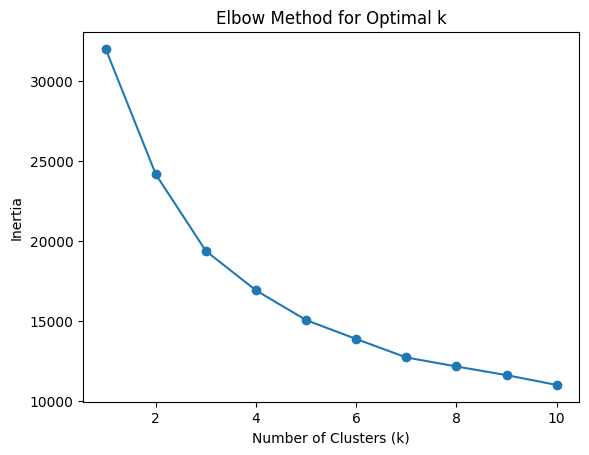

In [8]:
# to find optimal K

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

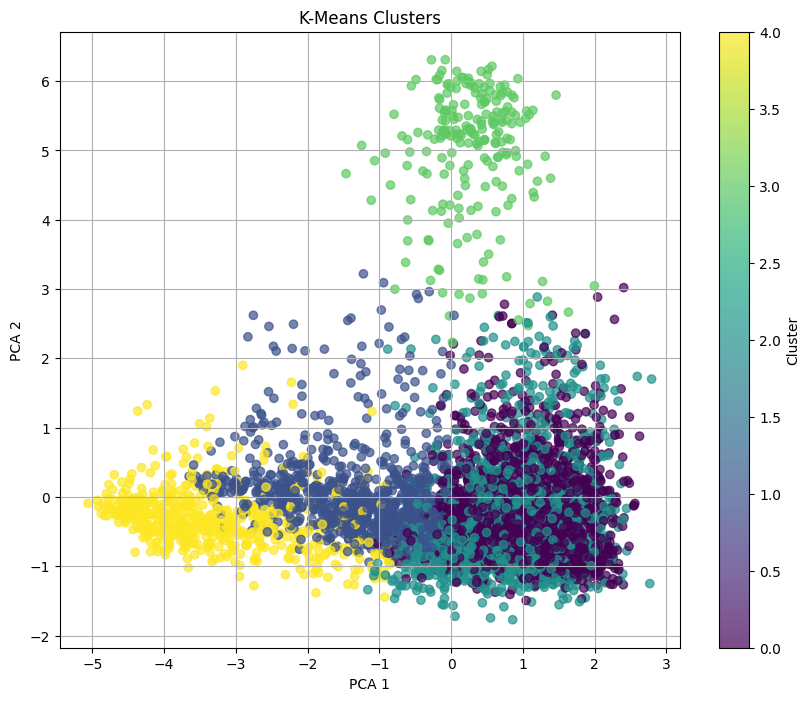

In [9]:
# Apply KMeans with optimal k

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # ← Required for PCA
import matplotlib.pyplot as plt

# Apply KMeans with optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title("K-Means Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

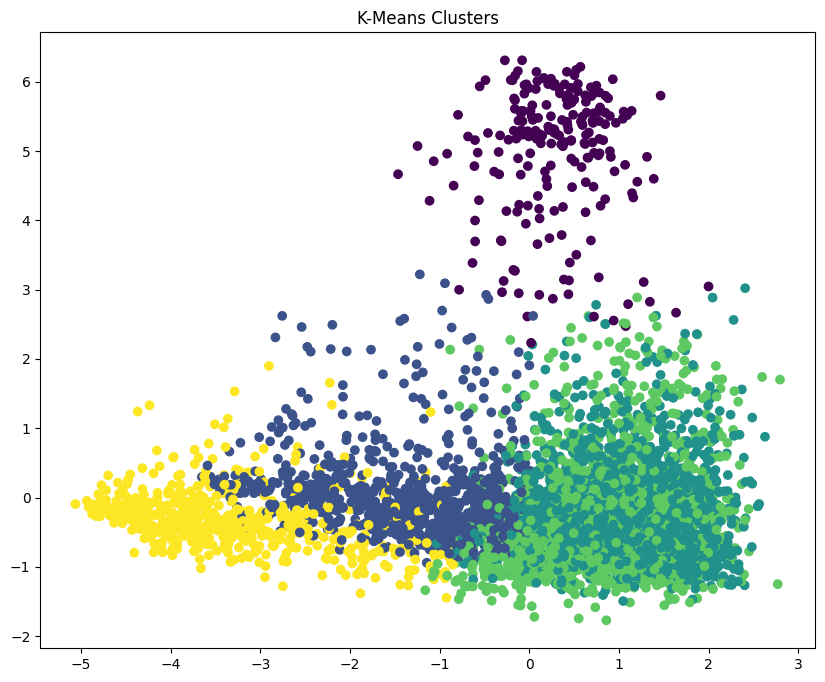

In [10]:
# Apply K-Means clustering with optimal k (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

In [11]:
from sklearn.cluster import DBSCAN
import numpy as np

df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numerical_features]),
    columns=numerical_features
)


dbscan = DBSCAN(eps=2.5, min_samples=5)  # Try increasing eps
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

print("\n" + "="*40)
print("📊 DBSCAN output")
print("="*40)

print("\n DBSCAN unique labels:", np.unique(df['DBSCAN_Cluster']))


📊 DBSCAN output

 DBSCAN unique labels: [-1  0]


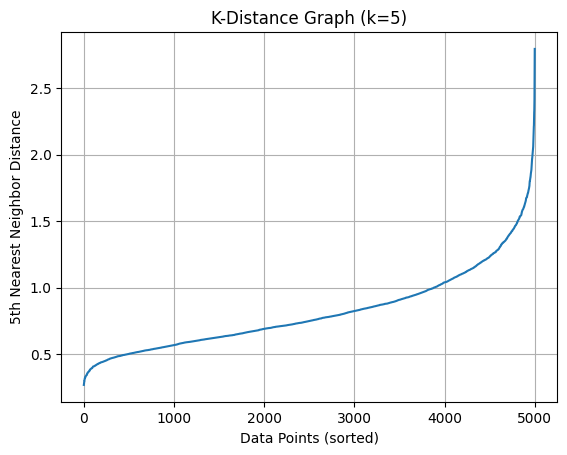

In [12]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Compute distances to the 5th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=5).fit(df_scaled)
distances, _ = nbrs.kneighbors(df_scaled)

# Sort the distances and plot
plt.plot(np.sort(distances[:, 4]))
plt.title("K-Distance Graph (k=5)")
plt.xlabel("Data Points (sorted)")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

In [14]:
# 6. Evaluation Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score
kmeans_sil = silhouette_score(df_scaled, df['Cluster'])
kmeans_db = davies_bouldin_score(df_scaled, df['Cluster'])
dbscan_labels = df['DBSCAN_Cluster']
if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) < len(df):
    dbscan_sil = silhouette_score(df_scaled, dbscan_labels)
else:
    dbscan_sil = None

    
print("\n" + "="*40)
print("📊 Evaluation Metrics")
print("="*40)
    

print("Silhouette Score (KMeans):", kmeans_sil)
print("Davies-Bouldin Score (KMeans):", kmeans_db)
if dbscan_sil is not None:
    print("Silhouette Score (DBSCAN):", dbscan_sil)
else:
    print("DBSCAN clustering not valid for silhouette score.")


📊 Evaluation Metrics
Silhouette Score (KMeans): 0.21075859658791374
Davies-Bouldin Score (KMeans): 1.4550773724806438
Silhouette Score (DBSCAN): 0.37477083449949244


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Select numerical features
numerical_features = ['valence', 'danceability', 'energy', 'tempo']

# Step 2: Prepare the data
X = df[numerical_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [18]:
def recommend_songs(song_name, df, num_recommendations=5):
    if song_name not in df['track_name'].values:
        return pd.DataFrame({"Message": [f"'{song_name}' not found."]})

    # Get the cluster for the input song
    song_cluster = df[df['track_name'] == song_name]['Cluster'].values[0]

    # Filter songs from the same cluster
    same_cluster_songs = df[df['Cluster'] == song_cluster].reset_index(drop=True)

    # Get index of the input song within this filtered list
    song_index = same_cluster_songs[same_cluster_songs['track_name'] == song_name].index[0]

    # Calculate cosine similarity
    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get top N recommendations (excluding the song itself)
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommendations = same_cluster_songs.iloc[similar_songs][['track_name', 'artist_name', 'genre']]

    return recommendations

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

input_song = "Desire"

if input_song in df['track_name'].values:
    recommended_songs = recommend_songs(input_song, df, num_recommendations=5)
    print(f"\n🎧 Songs similar to '{input_song}':")
    print(recommended_songs)
else:
    print(f"❌ '{input_song}' not found in dataset.")



🎧 Songs similar to 'Desire':
                     track_name       artist_name             genre
29369                     Sarah    Electric Guest              Soul
21838          Way of the World       Kyle Kinane            Comedy
16913                   Shadows  Three Legged Fox            Reggae
10315  Heaven in the Real World   The Wonder Kids  Children's Music
9989                    Kitchen          Kid Cudi           Hip-Hop


In [23]:
# Example usage
input_song = "Goosebumps"

recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs


Songs similar to 'Goosebumps':


,track_name,artist_name,genre
9017,Goosebumps,Meghan Trainor,R&B
15895,Man In The Hall,State Radio,Reggae
28153,I'm Not Famous,AJR,Rock
14447,I'm Not Famous,AJR,Pop
20616,Con Un Beso,Joey Montana,Reggaeton


In [24]:
# Example usage
input_song = "Say My Name"

recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

Songs similar to 'Say My Name':


,track_name,artist_name,genre
1925,Say My Name,Godsmack,Alternative
5735,Real Force,ELISA,Anime
18420,Change The World With My Hockey Stick,The Vandals,Ska
2063,Rebel Yell,Dope,Alternative
12403,Rebel Yell,Dope,Children’s Music


In [25]:
# Pick 5 random songs from your dataset
sample_songs = df['track_name'].drop_duplicates().sample(5, random_state=42).tolist()

# Generate and display recommendations
for song in sample_songs:
    print(f"\n🎵 Recommendations for '{song}':")
    recs = recommend_songs(song, df, num_recommendations=5)
    print(recs[['track_name', 'artist_name', 'genre']])


🎵 Recommendations for 'Tiny Clothes':
                                    track_name        artist_name       genre
3020   Killa (feat. Elliphant) - Slushii Remix              Wiwek  Electronic
15987                There's A Joke Everywhere      Katt Williams      Comedy
14798                                  Her Dad  Christopher Titus      Comedy
13869                                      Fat      Patton Oswalt      Comedy
13438                              Bad Parents   Anthony Jeselnik      Comedy

🎵 Recommendations for 'Tu Te Las Traes':
           track_name       artist_name    genre
24094             Fyl              SMLE     Soul
20915             Fyl              SMLE      Pop
6774      Fou d'amour  Céline Languedoc    Movie
27125  Middle of Love   Beverley Knight     Soul
9571   Not Going Back  Childish Gambino  Hip-Hop

🎵 Recommendations for 'Emilie Jolie, le coq, l'âne & le conteur':
                   track_name         artist_name             genre
29920       So I Can L

In [26]:
df.to_csv("clustered_spotify_songs.csv", index=False)
print("✅ Clustered dataset saved as 'clustered_spotify_songs.csv'")

✅ Clustered dataset saved as 'clustered_spotify_songs.csv'
